In [1]:
from DP54 import DP54_solver
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time
from matplotlib.gridspec import GridSpec
import numba

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')  
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.fontsize'] = 13

In [3]:
t_range = np.array((0.0, 20.0))
h_size = np.array((1e-6 ,1e0))
x0 = np.array((2.0, 0.0, 0.0))
argv = np.array((10.0, )) # argv[0] is mu in van der pol
reps = 1e-6
aeps = 1e-8
num_var = np.size(x0)
model = 1 # 1 is van der pol model
MAX_STEPS = int(395)
t_history, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)


Time: 0.000340 seconds
step size number is: 394


In [4]:
x_history_1 = x_history[:, 0]
x_history_2 = x_history[:, 1]

In [5]:
def vanderpol(t, y, mu):
    return [y[1], mu * (1 - y[0]**2) * y[1] - y[0]]

In [6]:
start = time.perf_counter()
mu = argv[0]
#t_eval = np.linspace(t_range[0], t_range[1], Nsamples + 1)
result = solve_ivp(
    fun=lambda t, y: vanderpol(t, y, mu),
    t_span=t_range,
    y0=x0[0:2],
    method='RK45',      
    #t_eval=t_eval,      
    rtol=reps,          
    atol=aeps,          
    first_step=h_size[0],  
    max_step=h_size[1]     
)

end = time.perf_counter()
elapsed = end - start

print(f"Time: {elapsed} seconds")

t_history_scipy = result.t           
x_history_1_scipy = result.y[0, :]   
x_history_2_scipy = result.y[1, :]   
step_sizes = np.diff(result.t)

Time: 0.05253391689620912 seconds


In [7]:
start = time.perf_counter()
mu = argv[0]
#t_eval = np.linspace(t_range[0], t_range[1], Nsamples + 1)
result = solve_ivp(
    fun=lambda t, y: vanderpol(t, y, mu),
    t_span=t_range,
    y0=x0[0:2],
    method='RK23',      
    #t_eval=t_eval,      
    rtol=reps,          
    atol=aeps,          
    first_step=h_size[0],  
    max_step=h_size[1]     
)

end = time.perf_counter()
elapsed = end - start

print(f"Time: {elapsed} seconds")

t_history_scipy2 = result.t           
x_history_1_scipy2 = result.y[0, :]   
x_history_2_scipy2 = result.y[1, :]   
step_sizes2 = np.diff(result.t)

Time: 0.016803374979645014 seconds


In [8]:
result

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-06 ...  1.996e+01  2.000e+01]
        y: [[ 2.000e+00  2.000e+00 ...  1.942e+00  1.939e+00]
            [ 0.000e+00 -2.000e-06 ... -6.992e-02 -7.008e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3994
     njev: 0
      nlu: 0

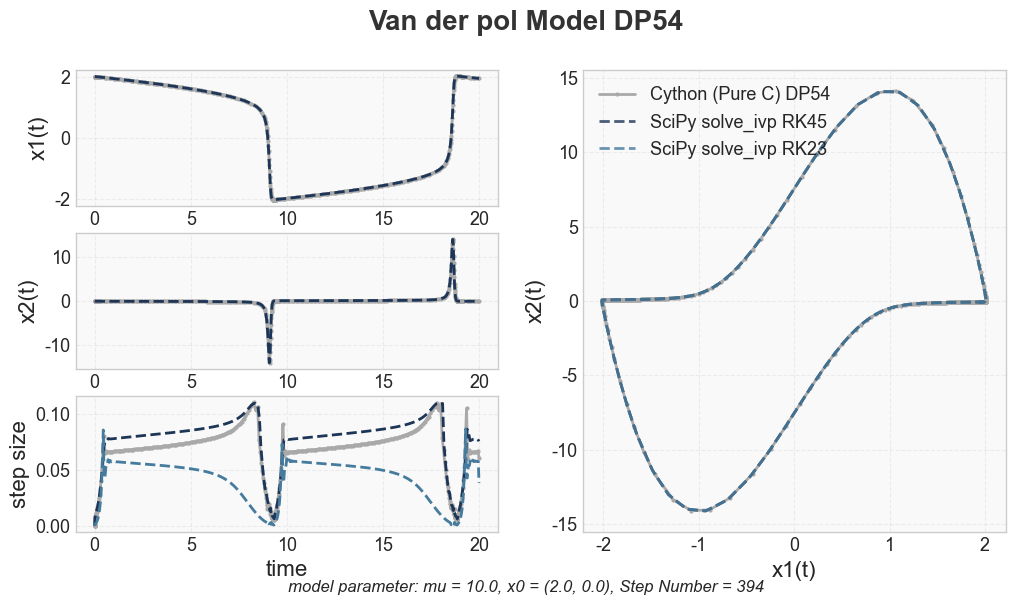

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid') 
gs = GridSpec(3, 2, figure=fig)
pic1 = fig.add_subplot(gs[0, 0])
pic2 = fig.add_subplot(gs[1, 0])
pic4 = fig.add_subplot(gs[2, 0])
pic3 = fig.add_subplot(gs[:, 1])
pic1.plot(t_history, x_history_1, '#A9A9A9', linewidth=2, markersize=4, marker='.', label=f'mu = {argv[0]}', alpha=1)    
pic2.plot(t_history, x_history_2, '#A9A9A9', linewidth=2, markersize=4, marker='.', label=f'mu = {argv[0]}', alpha=1) 
pic1.plot(t_history_scipy, x_history_1_scipy, '#1D3557', linewidth=2, markersize=4, alpha=1, linestyle='--')    
pic2.plot(t_history_scipy, x_history_2_scipy, '#1D3557', linewidth=2, markersize=4, alpha=1, linestyle='--') 
pic3.plot(x_history_1, x_history_2, '#A9A9A9', linewidth=2, marker='.', markersize=4, label=f'Cython (Pure C) DP54', alpha=1)    
pic4.plot(t_adaptive, t_adaptive_size, '#A9A9A9', linewidth=2, marker='.', markersize=4, label=f'mu = {argv[0]}', alpha=1)  
pic4.plot(t_history_scipy[1:], step_sizes, '#1D3557', linewidth=2, markersize=4, alpha=1, linestyle='--')  
pic4.plot(t_history_scipy2[1:], step_sizes2, '#457B9D', linewidth=2, markersize=4, alpha=1, linestyle='--')  
pic3.plot(x_history_1_scipy, x_history_2_scipy, '#1D3557', linewidth=2, markersize=4, label=f'SciPy solve_ivp RK45', alpha=0.8, linestyle='--')   
pic3.plot(x_history_1_scipy, x_history_2_scipy, '#457B9D', linewidth=2, markersize=4, label=f'SciPy solve_ivp RK23', alpha=0.8, linestyle='--')   
#pic4.set_yscale('log')  
pic1.set_ylabel('x1(t)')
pic2.set_ylabel('x2(t)')
pic4.set_xlabel('time')
pic4.set_ylabel('step size')
pic2.grid(True, which="both", ls="--", alpha=0.3)
pic4.grid(True, which="both", ls="--", alpha=0.3)
pic1.grid(True, which="both", ls="--", alpha=0.3)
pic3.set_xlabel('x1(t)')
pic3.set_ylabel('x2(t)')
pic3.grid(True, which="both", ls="--", alpha=0.3)
pic3.legend(loc='upper left') 
pic1.set_facecolor('#f9f9f9')
pic2.set_facecolor('#f9f9f9')
pic3.set_facecolor('#f9f9f9')
pic4.set_facecolor('#f9f9f9')

#fig.suptitle('Prey-Predator Model ', fontsize=18, fontweight='bold')
fig.suptitle('Van der pol Model DP54', fontsize=20, fontweight='bold', color='#333333', y=0.98)
fig.text(0.5, 0.01, f'model parameter: mu = {argv[0]}, x0 = {x0[0], x0[1]}, Step Number = {t_history.shape[0]}', ha='center', fontsize=12, style='italic')
fig.savefig("DP54_van_mu10.png")

In [10]:
t_range = np.array((0.0, 2000.0))
h_size = np.array((1e-6 ,1e-2))
x0 = np.array((2.0, 0.0, 0.0))
argv = np.array((1000.0, )) # argv[0] is mu in van der pol
reps = 1e-6
aeps = 1e-8
num_var = np.size(x0)
model = 1 # 1 is van der pol model
MAX_STEPS = int(1161262)
t_history, x_history, t_adaptive_size, t_adaptive = DP54_solver(x0, argv, t_range, h_size, reps, aeps, model, MAX_STEPS)


Time: 0.083583 seconds
step size number is: 1161261


In [11]:
x_history_1 = x_history[:, 0]
x_history_2 = x_history[:, 1]

In [12]:
start = time.perf_counter()
mu = argv[0]
h_size = np.array((1e-6 ,1e0))
#t_eval = np.linspace(t_range[0], t_range[1], Nsamples + 1)
result = solve_ivp(
    fun=lambda t, y: vanderpol(t, y, mu),
    t_span=t_range,
    y0=x0[0:2],
    method='RK45',      
    #t_eval=t_eval,      
    rtol=reps,          
    atol=aeps,          
    first_step=h_size[0],  
    max_step=h_size[1]     
)

end = time.perf_counter()
elapsed = end - start

print(f"Time: {elapsed} seconds")

t_history_scipy = result.t           
x_history_1_scipy = result.y[0, :]   
x_history_2_scipy = result.y[1, :]   
step_sizes = np.diff(result.t)

Time: 21.80584679218009 seconds


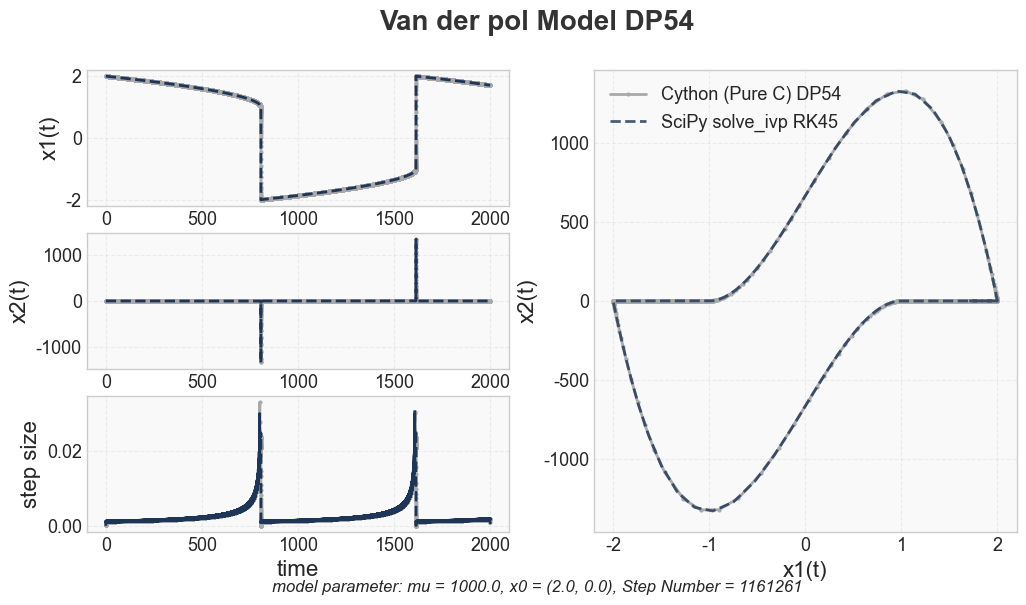

In [13]:
fig = plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid') 
gs = GridSpec(3, 2, figure=fig)
pic1 = fig.add_subplot(gs[0, 0])
pic2 = fig.add_subplot(gs[1, 0])
pic4 = fig.add_subplot(gs[2, 0])
pic3 = fig.add_subplot(gs[:, 1])
pic1.plot(t_history, x_history_1, '#A9A9A9', linewidth=2, markersize=4, marker='.', label=f'mu = {argv[0]}', alpha=1)    
pic2.plot(t_history, x_history_2, '#A9A9A9', linewidth=2, markersize=4, marker='.', label=f'mu = {argv[0]}', alpha=1) 
pic1.plot(t_history_scipy, x_history_1_scipy, '#1D3557', linewidth=2, markersize=4, alpha=1, linestyle='--')    
pic2.plot(t_history_scipy, x_history_2_scipy, '#1D3557', linewidth=2, markersize=4, alpha=1, linestyle='--') 
pic3.plot(x_history_1, x_history_2, '#A9A9A9', linewidth=2, marker='.', markersize=4, label=f'Cython (Pure C) DP54', alpha=1)    
pic4.plot(t_adaptive, t_adaptive_size, '#A9A9A9', linewidth=2, marker='.', markersize=4, label=f'mu = {argv[0]}', alpha=1)  
pic4.plot(t_history_scipy[1:], step_sizes, '#1D3557', linewidth=2, markersize=4, alpha=1, linestyle='--')  
pic3.plot(x_history_1_scipy, x_history_2_scipy, '#1D3557', linewidth=2, markersize=4, label=f'SciPy solve_ivp RK45', alpha=0.8, linestyle='--')   
#pic4.set_yscale('log')  
pic1.set_ylabel('x1(t)')
pic2.set_ylabel('x2(t)')
pic4.set_xlabel('time')
pic4.set_ylabel('step size')
pic2.grid(True, which="both", ls="--", alpha=0.3)
pic4.grid(True, which="both", ls="--", alpha=0.3)
pic1.grid(True, which="both", ls="--", alpha=0.3)
pic3.set_xlabel('x1(t)')
pic3.set_ylabel('x2(t)')
pic3.grid(True, which="both", ls="--", alpha=0.3)
pic3.legend(loc='upper left') 
pic1.set_facecolor('#f9f9f9')
pic2.set_facecolor('#f9f9f9')
pic3.set_facecolor('#f9f9f9')
pic4.set_facecolor('#f9f9f9')

#fig.suptitle('Prey-Predator Model ', fontsize=18, fontweight='bold')
fig.suptitle('Van der pol Model DP54', fontsize=20, fontweight='bold', color='#333333', y=0.98)
fig.text(0.5, 0.01, f'model parameter: mu = {argv[0]}, x0 = {x0[0], x0[1]}, Step Number = {t_history.shape[0]}', ha='center', fontsize=12, style='italic')
fig.savefig("DP54_van_mu1000.png")
